# Assignment is below at the end

- https://scikit-learn.org/stable/modules/tree.html
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

In [251]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['font.size'] = 14
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder 
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [189]:
df = pd.read_csv('adult.data', index_col=False)

In [190]:
golden = pd.read_csv('adult.test', index_col=False)

In [191]:
golden.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [192]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [193]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [194]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [195]:
from sklearn import preprocessing

In [196]:
# Columns we want to transform
transform_columns = ['sex']

#Columns we can't use because non-numerical
non_num_columns = ['workclass', 'education', 'marital-status', 
                     'occupation', 'relationship', 'race', 'sex', 
                     'native-country']

## First let's try using `pandas.get_dummies()` to transform columns

In [197]:
dummies = pd.get_dummies(df[transform_columns])
dummies

,sex_ Female,sex_ Male
0,False,True
1,False,True
2,False,True
3,False,True
4,True,False
...,...,...
32556,True,False
32557,False,True
32558,True,False
32559,False,True


In [198]:
dummies.shape

(32561, 2)

## sklearn has a similar process for OneHot Encoding features

In [199]:
onehot = preprocessing.OneHotEncoder(handle_unknown="infrequent_if_exist", sparse=False)
onehot.fit(df[transform_columns])

OneHotEncoder(handle_unknown='infrequent_if_exist', sparse=False,
              sparse_output=False)

In [200]:
onehot.categories_

[array([' Female', ' Male'], dtype=object)]

In [201]:
sex = onehot.transform(df[transform_columns])
sex

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [202]:
sex.shape

(32561, 2)

## In addition to OneHot encoding there is Ordinal Encoding 

In [203]:
enc = preprocessing.OrdinalEncoder()
enc.fit(df[["salary"]])
salary = enc.transform(df[["salary"]])
salary

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])

In [204]:
enc.categories_[0]

array([' <=50K', ' >50K'], dtype=object)

In [205]:
#x = df.copy()

# transformed = pd.get_dummies(df[transform_columns])


#onehot = preprocessing.OneHotEncoder(handle_unknown="infrequent_if_exist", sparse=False).fit(df[transform_columns])

#enc = preprocessing.OrdinalEncoder()

#enc.fit(df[["salary"]])


#transformed = onehot.transform(df[transform_columns])
#new_cols = list(onehot.categories_[0].flatten())
#df_trans = pd.DataFrame(transformed, columns=new_cols)


#x = pd.concat(
 #   [
#        x.drop(non_num_columns, axis=1), 
#        df_trans
#    ], 
#    axis=1,)

enc = preprocessing.OrdinalEncoder()
enc.fit(df[["salary"]])

x = df.copy()
x = pd.concat([x.drop(non_num_columns, axis=1), 
               pd.get_dummies(df[transform_columns])], axis = 1)


x["salary"] = enc.transform(df[["salary"]])

In [206]:
x.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,sex_ Female,sex_ Male
0,39,77516,13,2174,0,40,0.0,False,True
1,50,83311,13,0,0,13,0.0,False,True
2,38,215646,9,0,0,40,0.0,False,True
3,53,234721,7,0,0,40,0.0,False,True
4,28,338409,13,0,0,40,0.0,True,False


In [207]:
xt = golden.copy()

transformed = onehot.transform(xt[transform_columns])
new_cols = list(onehot.categories_[0].flatten())
#df_trans = pd.DataFrame(transformed, columns=new_cols)

#x = pd.concat(
#    [
#        xt.drop(non_num_columns, axis=1), 
#        df_trans
#    ], 
 #   axis=1,)
    
xt = pd.concat([xt.drop(non_num_columns, axis = 1),
               pd.get_dummies(xt[transform_columns])], axis = 1)

xt["salary"] = enc.fit_transform(golden[["salary"]])

In [208]:
xt.salary.value_counts()

salary
0.0    12435
1.0     3846
Name: count, dtype: int64

In [209]:
enc.categories_

[array([' <=50K.', ' >50K.'], dtype=object)]

In [210]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#### Choose the model of your preference: DecisionTree or RandomForest

In [211]:
model = RandomForestClassifier(criterion='entropy')

In [212]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=None)

In [213]:
model.fit(x.drop(['fnlwgt','salary'], axis=1), x.salary)

DecisionTreeClassifier(criterion='entropy')

In [214]:
model.tree_.node_count

8331

In [215]:
list(zip(x.drop(['fnlwgt','salary'], axis=1).columns, model.feature_importances_))

[('age', 0.3216700019355383),
 ('education-num', 0.16116281444141997),
 ('capital-gain', 0.22828731910597602),
 ('capital-loss', 0.07892358245256774),
 ('hours-per-week', 0.15437056857473613),
 ('sex_ Female', 0.05400574521972294),
 ('sex_ Male', 0.001579968270038819)]

In [216]:
list(zip(x.drop(['fnlwgt','salary'], axis=1).columns, model.feature_importances_))

[('age', 0.3216700019355383),
 ('education-num', 0.16116281444141997),
 ('capital-gain', 0.22828731910597602),
 ('capital-loss', 0.07892358245256774),
 ('hours-per-week', 0.15437056857473613),
 ('sex_ Female', 0.05400574521972294),
 ('sex_ Male', 0.001579968270038819)]

In [217]:
x.drop(['fnlwgt','salary'], axis=1).head()

,age,education-num,capital-gain,capital-loss,hours-per-week,sex_ Female,sex_ Male
0,39,13,2174,0,40,False,True
1,50,13,0,0,13,False,True
2,38,9,0,0,40,False,True
3,53,7,0,0,40,False,True
4,28,13,0,0,40,True,False


In [218]:
set(x.columns) - set(xt.columns)

set()

In [219]:
list(x.drop('salary', axis=1).columns)

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'sex_ Female',
 'sex_ Male']

In [220]:
predictions = model.predict(xt.drop(['fnlwgt','salary'], axis=1))
predictionsx = model.predict(x.drop(['fnlwgt','salary'], axis=1))

In [221]:
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, auc, roc_curve
)

In [222]:
accuracy_score(xt.salary, predictions)

0.8204655733677293

In [223]:
accuracy_score(xt.salary, predictions)

0.8204655733677293

In [224]:
confusion_matrix(xt.salary, predictions)

array([[11461,   974],
       [ 1949,  1897]])

In [225]:
print(classification_report(xt.salary, predictions))

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.89     12435
         1.0       0.66      0.49      0.56      3846

    accuracy                           0.82     16281
   macro avg       0.76      0.71      0.73     16281
weighted avg       0.81      0.82      0.81     16281



In [226]:
print(classification_report(xt.salary, predictions))

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.89     12435
         1.0       0.66      0.49      0.56      3846

    accuracy                           0.82     16281
   macro avg       0.76      0.71      0.73     16281
weighted avg       0.81      0.82      0.81     16281



In [227]:
accuracy_score(x.salary, predictionsx)

0.8955806025613464

In [228]:
confusion_matrix(x.salary, predictionsx)

array([[24097,   623],
       [ 2777,  5064]])

In [229]:
print(classification_report(x.salary, predictionsx))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93     24720
         1.0       0.89      0.65      0.75      7841

    accuracy                           0.90     32561
   macro avg       0.89      0.81      0.84     32561
weighted avg       0.90      0.90      0.89     32561



In [230]:
print(classification_report(x.salary, predictionsx))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93     24720
         1.0       0.89      0.65      0.75      7841

    accuracy                           0.90     32561
   macro avg       0.89      0.81      0.84     32561
weighted avg       0.90      0.90      0.89     32561



# For the following use the above `adult` dataset. 

# 1. Show the RandomForest outperforms the DecisionTree for a fixed `max_depth` by training using the train set and calculate `precision`, `recall`, `f1`, `confusion matrix` on golden-test set. Start with only numerical features/columns. (age, education-num, capital-gain, capital-loss, hours-per-week) 

In [231]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [232]:

x_train = df[['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
x_test = golden[['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]


In [233]:
le = LabelEncoder()
y_train = le.fit_transform(df['salary'])
y_test = le.transform(golden['salary'].str.replace('.', ''))

In [234]:
dtree = DecisionTreeClassifier(max_depth=10, random_state=42)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [235]:
rf = RandomForestClassifier(max_depth=10, random_state=42, n_estimators=100)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [236]:
dtree_predictions = dtree.predict(x_test)
rf_predictions = rf.predict(x_test)


In [237]:

mse_dtree = mean_squared_error(y_test, dtree_predictions)
print("MSE for Decision Tree:", mse_dtree)

mse_rf = mean_squared_error(y_test, rf_predictions)
print("MSE for Random Forest:", mse_rf)


MSE for Decision Tree: 0.16436336834346785
MSE for Random Forest: 0.16129230391253607


In [238]:
print("Decision Tree Performance:")
print(classification_report(y_test, dtree_predictions))
print(confusion_matrix(y_test, dtree_predictions))
print("Accuracy:", accuracy_score(y_test, dtree_predictions))

print("\nRandom Forest Performance:")
print(classification_report(y_test, rf_predictions))
print(confusion_matrix(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     12435
           1       0.75      0.46      0.57      3846

    accuracy                           0.84     16281
   macro avg       0.80      0.71      0.73     16281
weighted avg       0.83      0.84      0.82     16281

[[11840   595]
 [ 2081  1765]]
Accuracy: 0.8356366316565321

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     12435
           1       0.78      0.44      0.57      3846

    accuracy                           0.84     16281
   macro avg       0.81      0.70      0.73     16281
weighted avg       0.83      0.84      0.82     16281

[[11947   488]
 [ 2138  1708]]
Accuracy: 0.8387076960874639


In [256]:
metrics = {
    'Accuracy': [0.8356, 0.8387],  # Decision Tree, Random Forest
    'Precision': [0.75, 0.78],  # Precision for class 1
    'Recall': [0.46, 0.44],  # Recall for class 1
    'F1 Score': [0.57, 0.57]  # F1-score for class 1
}

In [252]:
# Confusion matrices
dtree_cm = np.array([[11840, 595], [2081, 1765]])
rf_cm = np.array([[11947, 488], [2138, 1708]])


In [264]:
# Normalize the confusion matrices
dtree_cm_normalized = dtree_cm.astype('float') / dtree_cm.sum(axis=1)[:, np.newaxis]
rf_cm_normalized = rf_cm.astype('float') / rf_cm.sum(axis=1)[:, np.newaxis]

models = ['Decision Tree', 'Random Forest']
metrics_names = list(metrics.keys())


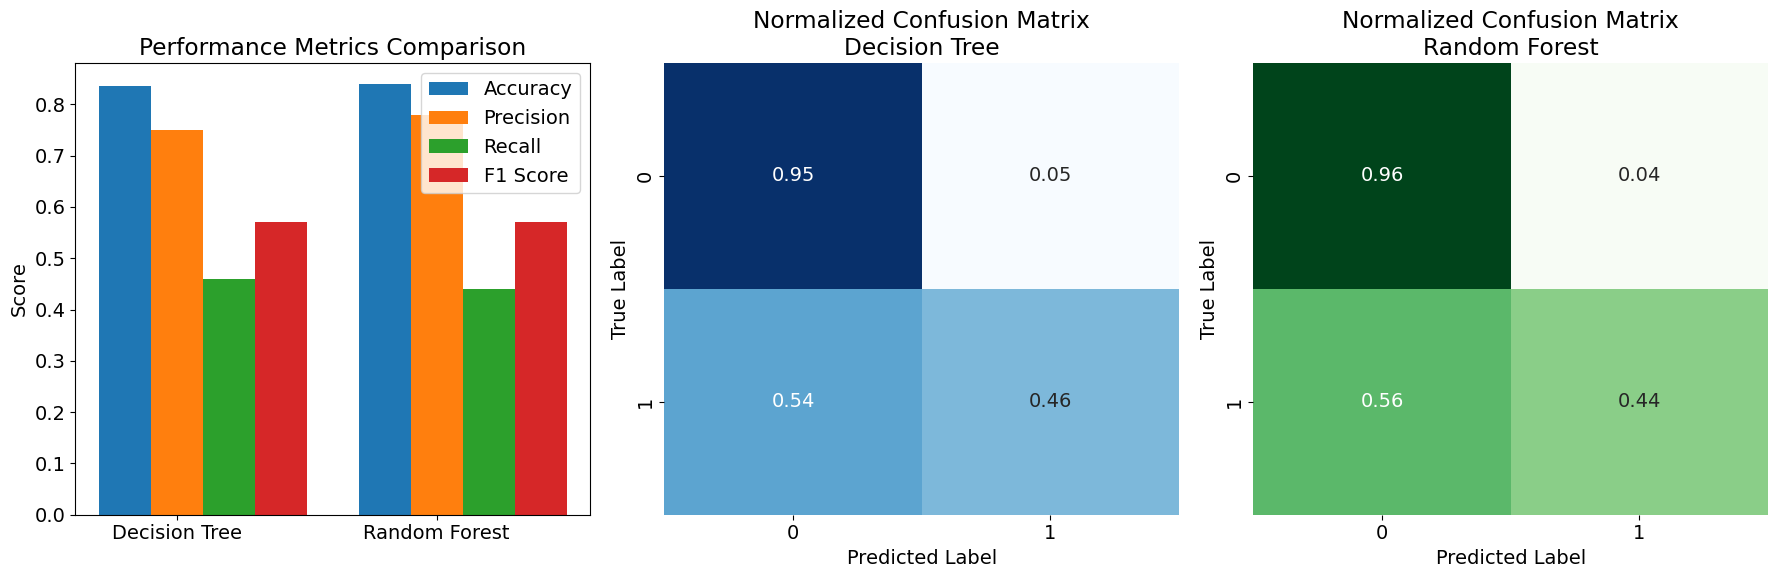

In [269]:
# Create the figures
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Bar chart for metrics
bar_width = 0.2
for i, metric in enumerate(metrics_names):
    ax[0].bar(np.arange(len(models)) + i * bar_width, metrics[metric], width=bar_width, label=metric)

ax[0].set_xticks(np.arange(len(models)) + bar_width)
ax[0].set_xticklabels(models)
ax[0].set_title('Performance Metrics Comparison')
ax[0].set_ylabel('Score')
ax[0].legend()

# Normalized Confusion Matrix for Decision Tree
sns.heatmap(dtree_cm_normalized, annot=True, fmt=".2f", cmap='Blues', ax=ax[1], cbar=False)
ax[1].set_title('Normalized Confusion Matrix\nDecision Tree')
ax[1].set_xlabel('Predicted Label')
ax[1].set_ylabel('True Label')

# Normalized Confusion Matrix for Random Forest
sns.heatmap(rf_cm_normalized, annot=True, fmt=".2f", cmap='Greens', ax=ax[2], cbar=False)
ax[2].set_title('Normalized Confusion Matrix\nRandom Forest')
ax[2].set_xlabel('Predicted Label')
ax[2].set_ylabel('True Label')

plt.tight_layout()
plt.show()


# 2. Use a RandomForest or DecisionTree and the `adult` dataset, systematically add new columns, one by one, that are non-numerical but converted using the feature-extraction techniques we learned. Using the golden-test set show [`precision`, `recall`, `f1`, `confusion matrix`] for each additional feature added.

In [239]:
# Try Removing any trailing spaces in column names because i am getting multiple errors
df.columns = df.columns.str.strip()
golden.columns = golden.columns.str.strip()


In [240]:
# Convert 'salary' column to string to ensure consistent handling because it uses <50k, and >50k
df['salary'] = df['salary'].astype(str).str.strip().replace('\.', '', regex=True)
golden['salary'] = golden['salary'].astype(str).str.strip().replace('\.', '', regex=True)



In [241]:
# Concatenate the dataframes temporarily for consistent label encoding
combined = pd.concat([df['salary'], golden['salary']])

# Preprocess the target variable
label_encoder = LabelEncoder()
combined_encoded = label_encoder.fit_transform(combined)

# Split the encoded labels back into the original train and test set sizes
df['salary'] = combined_encoded[:len(df)]
golden['salary'] = combined_encoded[len(df):]


In [242]:
# Define the numerical columns to start with
numerical_columns = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [243]:
# Additional non-numerical columns to be added systematically
non_numerical_columns = ['workclass', 'education', 'marital-status', 
                         'occupation', 'relationship', 'race', 'sex', 
                         'native-country']



In [244]:
# Initialize the RandomForest model
model = RandomForestClassifier(criterion='entropy', max_depth=10, random_state=42, n_estimators=100)


In [245]:
# Results dictionary to store the evaluation metrics
results = {}


In [246]:
# Train with initial numerical columns
x_train = df[numerical_columns]
x_test = golden[numerical_columns]
y_train = df['salary']
y_test = golden['salary']

# Fit the model and make initial predictions
model.fit(x_train, y_train)
predictions = model.predict(x_test)



In [247]:
# Store initial results
report = classification_report(y_test, predictions, output_dict=True)
results['Numerical Only'] = {
    'Precision': report['weighted avg']['precision'],
    'Recall': report['weighted avg']['recall'],
    'F1 Score': report['weighted avg']['f1-score'],
    'Confusion Matrix': confusion_matrix(y_test, predictions)
}


In [248]:
# Systematically add non-numerical features and evaluate model
for column in non_numerical_columns:
    onehot = OneHotEncoder(handle_unknown="ignore", sparse=False)
    transformed_train = onehot.fit_transform(df[[column]])
    transformed_test = onehot.transform(golden[[column]])

    # Expand the training and test sets
    x_train_expanded = pd.concat([x_train, pd.DataFrame(transformed_train, columns=onehot.categories_[0].flatten())], axis=1)
    x_test_expanded = pd.concat([x_test, pd.DataFrame(transformed_test, columns=onehot.categories_[0].flatten())], axis=1)
    
    # Fit the model with the expanded set
    model.fit(x_train_expanded, y_train)
    predictions = model.predict(x_test_expanded)
    
    # Evaluate and store results
    report = classification_report(y_test, predictions, output_dict=True)
    results[column] = {
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1 Score': report['weighted avg']['f1-score'],
        'Confusion Matrix': confusion_matrix(y_test, predictions)
    }

# Output results
for feature, metrics in results.items():
    print(f"Added feature: {feature}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1 Score: {metrics['F1 Score']}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}\n")

Added feature: Numerical Only
Precision: 0.8299670568236055
Recall: 0.8374178490264725
F1 Score: 0.8201473787855761
Confusion Matrix:
[[11941   494]
 [ 2153  1693]]

Added feature: workclass
Precision: 0.8326703392429503
Recall: 0.8373564277378539
F1 Score: 0.8171103303568299
Confusion Matrix:
[[12040   395]
 [ 2253  1593]]

Added feature: education
Precision: 0.8276867410963832
Recall: 0.8360051593882439
F1 Score: 0.8191996991502924
Confusion Matrix:
[[11908   527]
 [ 2143  1703]]

Added feature: marital-status
Precision: 0.8529936661687565
Recall: 0.8581782445795713
F1 Score: 0.8470734426686767
Confusion Matrix:
[[11940   495]
 [ 1814  2032]]

Added feature: occupation
Precision: 0.8320264950302814
Recall: 0.8361894232540998
F1 Score: 0.8149267919968474
Confusion Matrix:
[[12058   377]
 [ 2290  1556]]

Added feature: relationship
Precision: 0.8543018432468927
Recall: 0.8592838277747067
F1 Score: 0.8483086540802356
Confusion Matrix:
[[11947   488]
 [ 1803  2043]]

Added feature: race


In [270]:
features = list(results.keys())
precisions = [results[feature]['Precision'] for feature in features]
recalls = [results[feature]['Recall'] for feature in features]
f1_scores = [results[feature]['F1 Score'] for feature in features]

In [271]:
data = pd.DataFrame({
    'Feature': features,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})


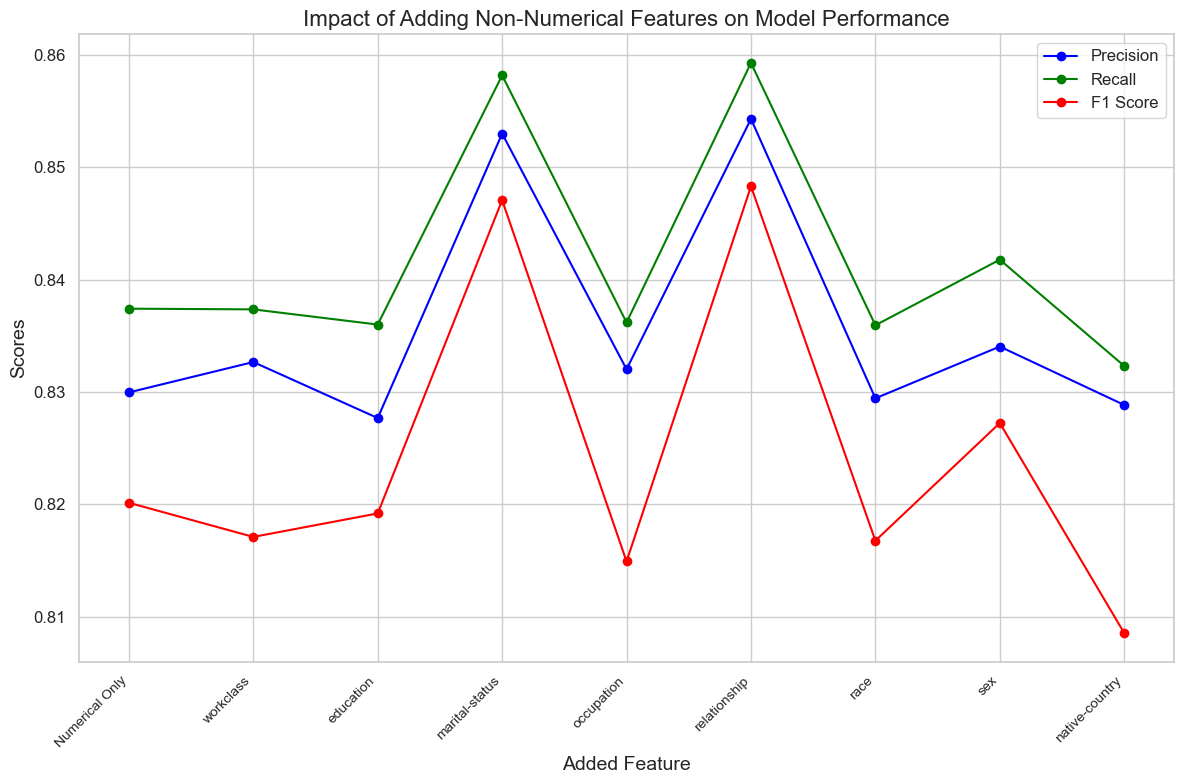

In [272]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

plt.plot(data['Feature'], data['Precision'], marker='o', label='Precision', color='blue')
plt.plot(data['Feature'], data['Recall'], marker='o', label='Recall', color='green')
plt.plot(data['Feature'], data['F1 Score'], marker='o', label='F1 Score', color='red')

plt.title('Impact of Adding Non-Numerical Features on Model Performance', fontsize=16)
plt.xlabel('Added Feature', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate feature names for better visibility
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()

In this analysis the approach I used focuses on enhancing model performance through feature engineering by integrating non numeric features into a machine learning model. To begin the model is initially trained using data to establish a performance baseline measured by metrics, like precision, recall and F1 score. This initial stage is crucial as it creates a reference point for evaluations. Subsequently non numeric features are added one by one. The model is retrained after each addition. This step, by step inclusion allows for observing how each categorical feature individually influences the models performance metrics.


One hot encoding is used to change variables into a format that works for training models. Each category becomes a column to prevent any confusion, between categorical and ordinal data. The model is assessed after adding each feature and important performance measures are reassessed. This systematic assessment helps identify which features improve the models accuracy guiding decisions, on selecting features to boost model performance.

The results of adding features are shown in a line graph clearly displaying how each feature impacts the models accuracy, completeness and overall performance. This visual representation helps to give measurable insights into the role of each feature in improving the models effectiveness guiding enhancements. This thorough and step, by step method of training the model and incorporating features not ensures a final model but also supports data driven decision making making the model more predictable and dependable, for real world use.
